<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧾NAME ENTITY RECOGNITION🧾</div>

![](https://media.licdn.com/dms/image/C4E12AQGLpkHPU_rYlw/article-cover_image-shrink_720_1280/0/1608096182738?e=2147483647&v=beta&t=7-oVwUB2YREDm-W0JJgGI88zBWYqDFhwxoDzOQv5KsU)

Named Entity Recognition (NER) is a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into predefined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc. NER is essential in various natural language processing (NLP) applications, including text summarization, question answering, and machine translation.

### Steps to Perform Named Entity Recognition (NER)

1. **Data Collection**:
   - Gather a large corpus of text that contains the entities you want to recognize. This could be news articles, social media posts, medical records, etc.

2. **Data Preprocessing**:
   - **Tokenization**: Split the text into individual tokens (words, punctuation, etc.).
   - **Normalization**: Convert all text to a consistent format, such as lowercasing, removing punctuation, and handling special characters.
   - **Sentence Segmentation**: Divide the text into sentences, which helps in context understanding.

3. **Annotation**:
   - Manually label the entities in your text corpus. This step involves creating a labeled dataset where each token is tagged with an appropriate entity label (e.g., PERSON, LOCATION, ORGANIZATION).
   - Tools like Brat, Prodigy, or spaCy's annotation tool can help with this process.

4. **Feature Engineering**:
   - Extract features from the text that will help the model recognize entities. Common features include:
     - Word-level features: Word itself, lowercased word, word length, prefix and suffix.
     - Part of Speech (POS) tags.
     - Word embeddings (e.g., word2vec, GloVe, BERT embeddings).
     - Capitalization, punctuation, and numerical features.

5. **Model Selection**:
   - Choose a model to train for NER. Common models include:
     - **Conditional Random Fields (CRF)**: A statistical modeling method often used for structured prediction.
     - **Recurrent Neural Networks (RNN)** and **Long Short-Term Memory networks (LSTM)**: Good for handling sequential data.
     - **Transformers** (like BERT): Provide state-of-the-art results for many NLP tasks, including NER.

6. **Training**:
   - Split the labeled data into training, validation, and test sets.
   - Train the selected model on the training data. Adjust hyperparameters and use the validation set to tune the model.

7. **Evaluation**:
   - Evaluate the model's performance on the test set using metrics like Precision, Recall, and F1-Score.
   - Precision: The proportion of predicted entities that are correct.
   - Recall: The proportion of actual entities that are correctly predicted.
   - F1-Score: The harmonic mean of Precision and Recall.

8. **Post-processing**:
   - Apply rules or additional logic to refine the results. This can include:
     - Handling overlapping entities.
     - Merging split entities.
     - Correcting common errors.

9. **Deployment**:
   - Once the model is trained and evaluated, deploy it to process new texts. This involves setting up an API or integrating the model into an application.

### Example Libraries and Tools for NER

- **spaCy**: A popular NLP library that provides pre-trained NER models and tools for training custom models.
- **NLTK**: Provides basic NER capabilities and is useful for educational purposes.
- **Stanford NLP**: Offers robust NER tools and models.
- **Hugging Face Transformers**: Contains pre-trained transformer models like BERT that can be fine-tuned for NER tasks.

### Example Code with spaCy

Here's a simple example of how to use spaCy for NER:

```python
import spacy

# Load a pre-trained NER model
nlp = spacy.load("en_core_web_sm")

# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Print recognized entities
for ent in doc.ents:
    print(ent.text, ent.label_)
```

This code loads a pre-trained spaCy model, processes a sentence to identify entities, and prints each entity with its label.

By following these steps and utilizing the right tools, you can develop and deploy an effective NER system tailored to your specific needs.

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📂IMPORTING LIBRARIES📂</div>

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import ast
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Input,Bidirectional,LSTM,Embedding, Masking
from keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2024-05-21 19:53:53.411717: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 19:53:53.411832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 19:53:53.531628: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/named-entity-recognition-ner-corpus/ner.csv


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜READING THE FILE PATH📜</div>

In [2]:
def loading_data(data_path):
    
    data = pd.read_csv(data_path)
    
    data.dropna(inplace=True)
    print("Number of rows : ",data.shape[0]," and the number of columns : ",data.shape[1])
    
    return data

In [3]:
data = loading_data("/kaggle/input/named-entity-recognition-ner-corpus/ner.csv")

Number of rows :  47959  and the number of columns :  4


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥SAMPLE OF NER DATA🔥</div>

In [4]:
data.sample(5).sample(5).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,Sentence #,Sentence,POS,Tag
32408,Sentence: 32409,"Prosecutors charge that Antoin "" Tony "" Rezko tried to extort millions of dollars in kickbacks from investment houses that wanted to do business with Illinois state boards .","['NNS', 'VBP', 'IN', 'NNP', '``', 'NNP', '``', 'NNP', 'VBD', 'TO', 'VB', 'NNS', 'IN', 'NNS', 'IN', 'NNS', 'IN', 'NN', 'NNS', 'WDT', 'VBD', 'TO', 'VB', 'NN', 'IN', 'NNP', 'NN', 'NNS', '.']","['O', 'O', 'O', 'B-org', 'I-org', 'I-org', 'I-org', 'I-org', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-org', 'O', 'O', 'O']"
2018,Sentence: 2019,Mr. Sassou-Nguesso was named AU president last week after Sudan 's bid to head the 53-nation block failed because of concerns over its human rights record .,"['NNP', 'NNP', 'VBD', 'VBN', 'NNP', 'NN', 'JJ', 'NN', 'IN', 'NNP', 'POS', 'NN', 'TO', 'VB', 'DT', 'JJ', 'NN', 'VBD', 'IN', 'IN', 'NNS', 'IN', 'PRP$', 'JJ', 'NNS', 'NN', '.']","['B-per', 'I-per', 'O', 'O', 'B-org', 'O', 'O', 'O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"
15033,Sentence: 15034,The Horse consented and allowed the man to mount him .,"['DT', 'NN', 'VBD', 'CC', 'VBD', 'DT', 'NN', 'TO', 'VB', 'PRP', '.']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"
10979,Sentence: 10980,Tradition has it that the Vatican Post Office issues a special stamp upon the death of a pope .,"['NN', 'VBZ', 'PRP', 'IN', 'DT', 'NNP', 'NNP', 'NNP', 'VBZ', 'DT', 'JJ', 'NN', 'IN', 'DT', 'NN', 'IN', 'DT', 'NN', '.']","['O', 'O', 'O', 'O', 'O', 'B-org', 'I-org', 'I-org', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"
32850,Sentence: 32851,"In a statement issued Saturday , the president said the deal will help both nations meet their energy needs without increasing air pollution and greenhouse gases .","['IN', 'DT', 'NN', 'VBN', 'NNP', ',', 'DT', 'NN', 'VBD', 'DT', 'NN', 'MD', 'VB', 'DT', 'NNS', 'VBP', 'PRP$', 'NN', 'NNS', 'IN', 'VBG', 'NN', 'NN', 'CC', 'NN', 'NNS', '.']","['O', 'O', 'O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🛠DATA PREPROCESSING🛠</div>

In [5]:
def preprocess_data(data):
    for i in range(len(data)):
        pos = ast.literal_eval(data.loc[i, 'POS'])
        tags = ast.literal_eval(data.loc[i, 'Tag'])
        data.loc[i, 'POS'] = [str(word) for word in pos]
        data.loc[i, 'Tag'] = [str(word.upper()) for word in tags]
    return data

In [6]:
data = preprocess_data(data)

In [7]:
data.sample(5).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,Sentence #,Sentence,POS,Tag
16997,Sentence: 16998,"In violence Thursday , more than 20 people were killed in Iraq .","['IN', 'NN', 'NNP', ',', 'JJR', 'IN', 'CD', 'NNS', 'VBD', 'VBN', 'IN', 'NNP', '.']","['O', 'O', 'B-TIM', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-GEO', 'O']"
46000,Sentence: 46001,"Now ranked 29th in the world , Pierce is a former Australian Open and French Open champion .","['RB', 'VBN', 'JJ', 'IN', 'DT', 'NN', ',', 'NNP', 'VBZ', 'DT', 'JJ', 'JJ', 'NN', 'CC', 'JJ', 'NN', 'NN', '.']","['O', 'O', 'B-TIM', 'O', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'B-GPE', 'B-ORG', 'I-ORG', 'B-GPE', 'B-ORG', 'O', 'O']"
13045,Sentence: 13046,"Senator Reid also called for the resignation of Mr. Bush 's chief adviser , Karl Rove .","['NNP', 'NNP', 'RB', 'VBD', 'IN', 'DT', 'NN', 'IN', 'NNP', 'NNP', 'POS', 'JJ', 'NN', ',', 'NNP', 'NNP', '.']","['B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O']"
8634,Sentence: 8635,Li was later subdued and taken into police custody .,"['NNP', 'VBD', 'RB', 'VBN', 'CC', 'VBN', 'IN', 'NN', 'NN', '.']","['B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"
24665,Sentence: 24666,"A time bomb planted on a parked bicycle exploded and ripped through a crowd of young men outside the military office , killing 12 of them and wounding 38 .","['DT', 'NN', 'NN', 'VBD', 'IN', 'DT', 'JJ', 'NN', 'VBD', 'CC', 'VBD', 'IN', 'DT', 'NN', 'IN', 'JJ', 'NNS', 'IN', 'DT', 'JJ', 'NN', ',', 'VBG', 'CD', 'IN', 'PRP', 'CC', 'VBG', 'CD', '.']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> ✨TRAIN-TEST-SPLIT✨</div>

In [8]:
df_final = data[['Sentence','Tag']]

In [9]:
df_train,df_test = train_test_split(df_final,test_size=0.2,random_state=42)
len(df_train),len(df_test)

(38367, 9592)

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🛠TOKENIZATION🛠</div>

In [10]:
train_targets = list(df_train.Tag.values)
test_targets = list(df_test.Tag.values)

tokenizer = Tokenizer(lower=False,oov_token="UNK")
tokenizer.fit_on_texts(df_train['Sentence'])

train_inputs = tokenizer.texts_to_sequences(df_train['Sentence'])
test_inputs = tokenizer.texts_to_sequences(df_test['Sentence'])

In [11]:
word2idx = tokenizer.word_index
V = len(word2idx) # Vocab size
print("Found %s unique tokens "%V)

Found 28761 unique tokens 


In [12]:
train_tags = set([val for sublist in train_targets for val in sublist])
test_tags = set([val for sublist in test_targets for val in sublist])

print("Unique NER tags in train set: ",train_tags)
print("Unique NER tags in test set: ",test_tags)

Unique NER tags in train set:  {'O', 'B-EVE', 'I-EVE', 'B-PER', 'B-NAT', 'B-ORG', 'I-TIM', 'B-GEO', 'I-NAT', 'I-GPE', 'B-ART', 'I-ART', 'B-TIM', 'I-PER', 'B-GPE', 'I-GEO', 'I-ORG'}
Unique NER tags in test set:  {'O', 'B-EVE', 'I-EVE', 'B-PER', 'B-NAT', 'I-TIM', 'I-GPE', 'B-GEO', 'B-ART', 'I-NAT', 'I-ART', 'B-TIM', 'I-PER', 'B-GPE', 'I-ORG', 'I-GEO', 'B-ORG'}


In [13]:
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(train_targets)
train_tgt_int = tag_tokenizer.texts_to_sequences(train_targets)
test_tgt_int = tag_tokenizer.texts_to_sequences(test_targets)

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🛠PADDING-SEQUENCE🛠</div>

In [14]:
# Max length
max_length_train = max(len(sent) for sent in train_inputs)
max_length_test = max(len(sent) for sent in test_inputs)
max_length = max(max_length_train,max_length_test)

# Pad input sequences
train_inputs_final = pad_sequences(train_inputs,maxlen=max_length,padding="post")
print("Shape of train inputs: ",train_inputs_final.shape)

test_inputs_final = pad_sequences(test_inputs,maxlen=max_length,padding="post")
print("Shape of test inputs: ",test_inputs_final.shape)

train_targets_final = pad_sequences(train_tgt_int,maxlen=max_length,padding="post")
print("Shape of train targets: ",train_targets_final.shape)

test_targets_final = pad_sequences(test_tgt_int,maxlen=max_length,padding="post")
print("Shape of test targets: ",test_targets_final.shape)

Shape of train inputs:  (38367, 89)
Shape of test inputs:  (9592, 89)
Shape of train targets:  (38367, 89)
Shape of test targets:  (9592, 89)


In [15]:
# Number of classes

K = len(tag_tokenizer.word_index)  +1
K

18

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> MODEL-1 (LSTM)</div>

![](https://miro.medium.com/v2/resize:fit:674/1*jikKbzFXCq-IYnFZankIMg.png)

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
max_length = 89
V = 10000  
K = 18  

In [18]:
vector_size = 16
i = Input(shape=(max_length,))
x = Embedding(input_dim=V+1, output_dim=vector_size, mask_zero=True)(i)
x = Masking()(x)  # Masking layer to handle variable length sequences
x = Bidirectional(LSTM(32, return_sequences=True))(x)
x = Dense(K)(x)

model = Model(i, x)

In [19]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 89)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 89, 16)    │    160,016 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 89, 16)    │          0 │ embedding[0][0]   │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking (Masking)   │ (None, 89, 16)    │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any (Any)           │ (None, 89)        │          0 │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 89, 64)    │     12,544 │ masking[0][0],    │
│ (Bidirectional)     │                   │            │ any[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 89, 18)    │      1,170 │ bidirectional[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 173,730 (678.63 KB)

 Trainable params: 173,730 (678.63 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile the model with the custom F1Score metric
model.compile(
    optimizer="adam",
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧬MODEL TRAINING🧬</div>

In [21]:
print(f"train_inputs_final shape: {train_inputs_final.shape}")
print(f"train_targets_final shape: {train_targets_final.shape}")
print(f"test_inputs_final shape: {test_inputs_final.shape}")
print(f"test_targets_final shape: {test_targets_final.shape}")

train_inputs_final shape: (38367, 89)
train_targets_final shape: (38367, 89)
test_inputs_final shape: (9592, 89)
test_targets_final shape: (9592, 89)


In [22]:
# Define callbacks
checkpoint = ModelCheckpoint("/kaggle/working/model_checkpoint.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(
    train_inputs_final,
    train_targets_final,
    epochs=50,
    validation_data=(test_inputs_final, test_targets_final),
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50
1196/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9211 - loss: 0.3877
Epoch 1: val_loss improved from inf to 0.15016, saving model to /kaggle/working/model_checkpoint.keras
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9212 - loss: 0.3871 - val_accuracy: 0.9567 - val_loss: 0.1502
Epoch 2/50
1195/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9589 - loss: 0.1389
Epoch 2: val_loss improved from 0.15016 to 0.11696, saving model to /kaggle/working/model_checkpoint.keras
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9589 - loss: 0.1388 - val_accuracy: 0.9643 - val_loss: 0.1170
Epoch 3/50
1195/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9662 - loss: 0.1076
Epoch 3: val_loss improved from 0.11696 to 0.10294, saving model to /kaggle/working/model_checkpoint.keras
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9662 - loss: 0.1076 - val_accuracy: 0.9673 - val_loss: 0.1029
Epoch 4/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - 

In [23]:
# Save the model to a file using tf.keras.models.save_model()
#tf.keras.models.save_model(model, "/kaggle/working/ner_model.h5")

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📈MODEL TRAINING GRAPH📉</div>

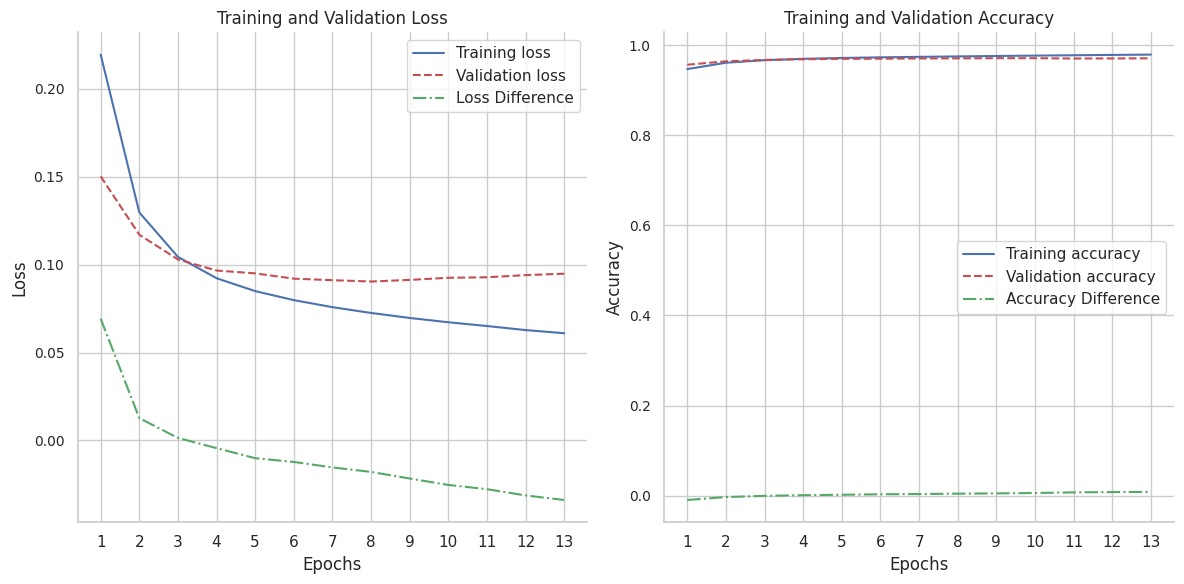

In [24]:
sns.set(style="whitegrid")

# Get training history
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Calculate differences
loss_diff = [train_loss[i] - val_loss[i] for i in range(len(train_loss))]
acc_diff = [train_acc[i] - val_acc[i] for i in range(len(train_acc))]

# Plot training and validation loss in subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.plot(epochs, loss_diff, 'g-.', label='Loss Difference')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(epochs)
plt.yticks(fontsize=10)

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation accuracy')
plt.plot(epochs, acc_diff, 'g-.', label='Accuracy Difference')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(epochs)
plt.yticks(fontsize=10)

plt.tight_layout()

# Show plot
plt.show()


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥MODEL PREDICTION🔥</div>

In [25]:
unique_tags = ['O', 'B-GEO', 'B-GPE', 'B-ORG', 'B-PER', 'B-ART', 'B-EVE', 'B-NAT', 'B-TIM', 
               'I-GEO', 'I-GPE', 'I-ORG', 'I-PER', 'I-ART', 'I-EVE', 'I-NAT', 'I-TIM', 'PAD']  # Added 'PAD' tag

In [26]:
# Define your sample sentence
sentence = "Polish Prime Minister Jaroslaw Kaczynski has voiced support for the deployment of 10 U.S. missile interceptors in Poland and guidance technology in the Czech Republic."

# Preprocess the sentence
tokenized_sentence = tokenizer.texts_to_sequences([sentence])
padded_sentence = pad_sequences(tokenized_sentence, maxlen=max_length, padding="post")

# Make predictions
predictions = model.predict(padded_sentence)
prediction_ner = np.argmax(predictions, axis=-1)

# Check the shapes and classes
print(f"Shape of predictions array: {predictions.shape}")
print(f"Number of unique tags: {len(unique_tags)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Shape of predictions array: (1, 89, 18)
Number of unique tags: 18


In [27]:
# Ensuring the number of classes matches the length of unique_tags
assert len(unique_tags) == predictions.shape[-1], "Number of classes does not match the length of unique tags"

# Get the predicted tags
predicted_tags = [[unique_tags[idx] for idx in sentence] for sentence in prediction_ner]

# Example sentence and its predictions
example_sentence = sentence.split()  # Use sentence tokens instead of dummy 'tokens'
example_predictions = predicted_tags[0]

# Displaying the tokens with their predicted tags
from tabulate import tabulate
table = [[token, tag] for token, tag in zip(example_sentence, example_predictions)]
print(tabulate(table, headers=["Token", "Predicted NER Tag"], tablefmt="grid"))

+--------------+---------------------+
| Token        | Predicted NER Tag   |
+==============+=====================+
| Polish       | B-TIM               |
+--------------+---------------------+
| Prime        | B-EVE               |
+--------------+---------------------+
| Minister     | B-ART               |
+--------------+---------------------+
| Jaroslaw     | B-ART               |
+--------------+---------------------+
| Kaczynski    | B-ART               |
+--------------+---------------------+
| has          | B-GEO               |
+--------------+---------------------+
| voiced       | B-GEO               |
+--------------+---------------------+
| support      | B-GEO               |
+--------------+---------------------+
| for          | B-GEO               |
+--------------+---------------------+
| the          | B-GEO               |
+--------------+---------------------+
| deployment   | B-GEO               |
+--------------+---------------------+
| of           | B-GEO   

In [28]:
import warnings

# Suppress specific seaborn warning
warnings.filterwarnings("ignore", message=".*The `size` parameter has been renamed to `height`.*")
warnings.filterwarnings("ignore", message=".*The `xticks` positional argument has been renamed to `x`.*")


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥MODEL PREDICTION GRAPH🔥</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


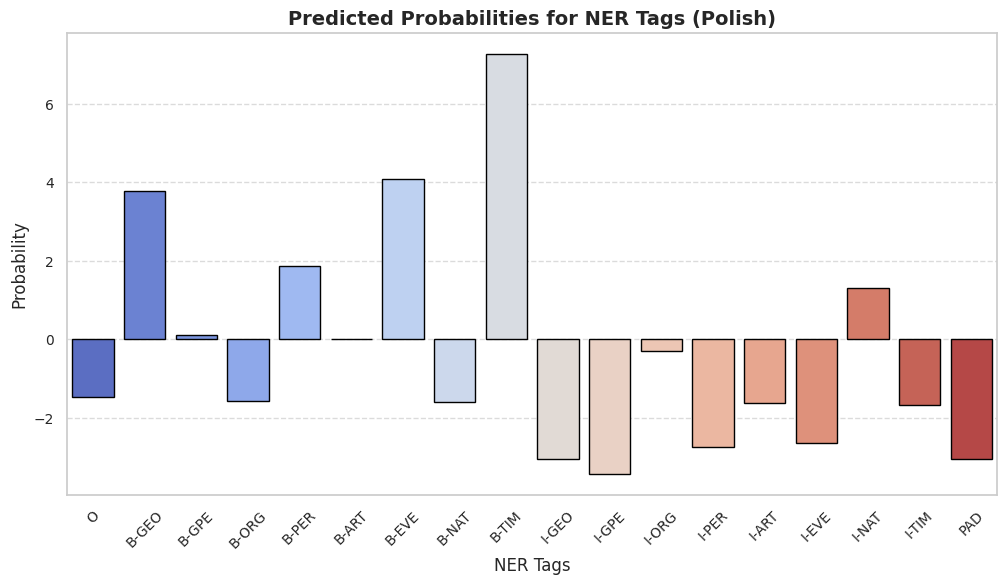

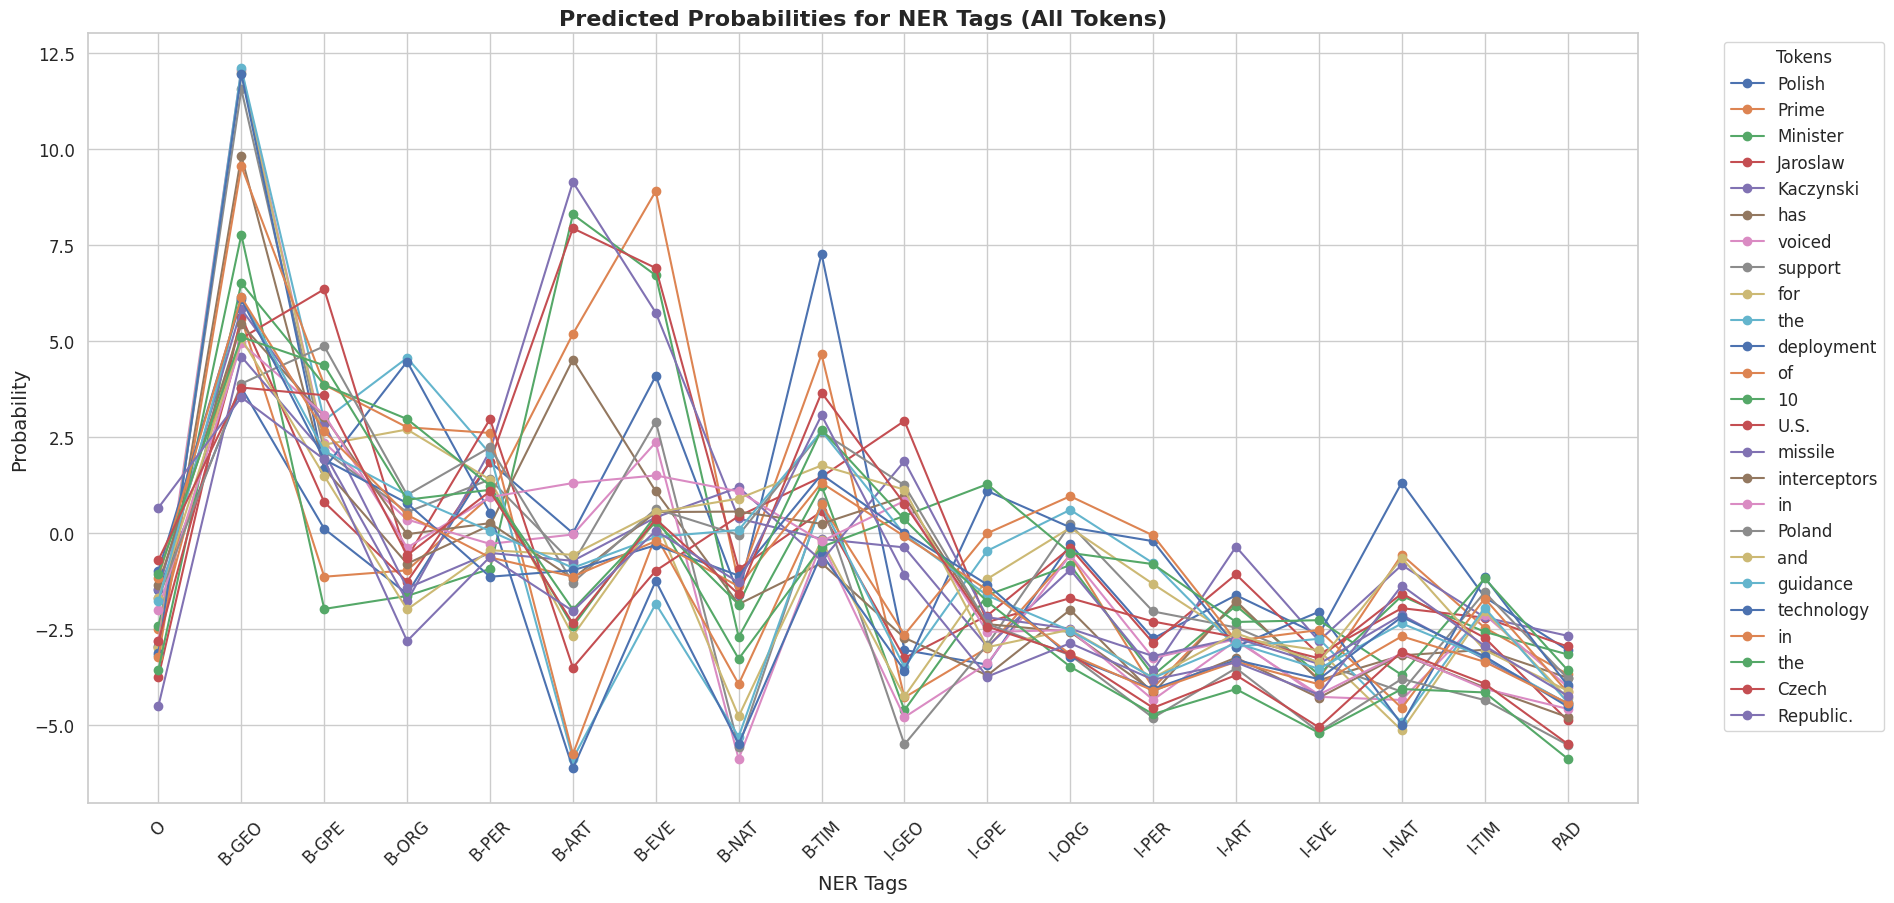

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


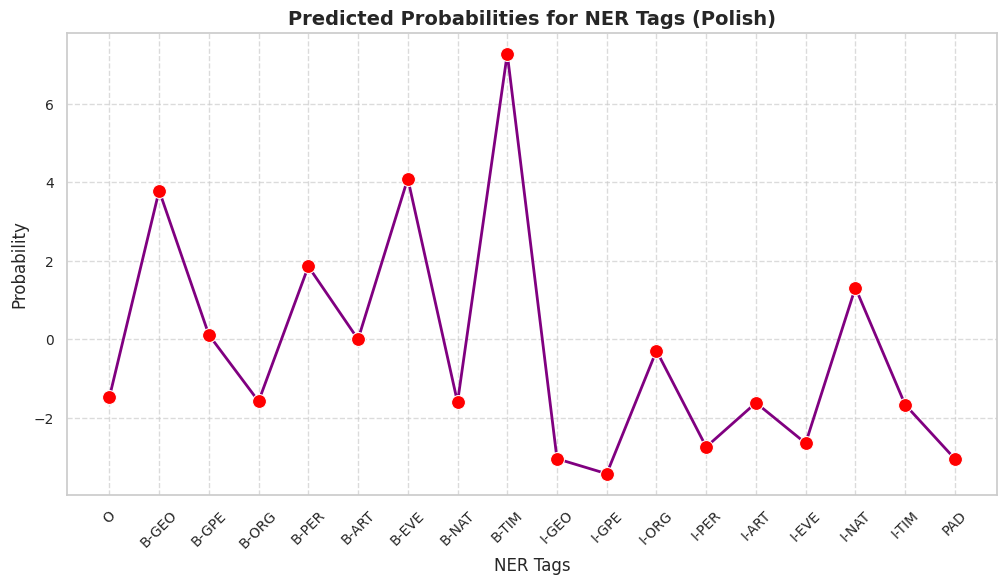

In [29]:
# Bar Plot for the first token
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_tags, y=predictions[0][0], palette='coolwarm', edgecolor='black')
plt.title(f'Predicted Probabilities for NER Tags ({example_sentence[0]})', fontsize=14, weight='bold')
plt.xlabel('NER Tags', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(20, 10))

# Plotting line plots for each token
for i, token in enumerate(example_sentence):
    plt.plot(unique_tags, predictions[0][i], label=token, marker='o')

plt.title('Predicted Probabilities for NER Tags (All Tokens)', fontsize=16, weight='bold')
plt.xlabel('NER Tags', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Tokens', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True)
plt.show()


# Line Plot for the first token
plt.figure(figsize=(12, 6))
sns.lineplot(x=unique_tags, y=predictions[0][0], marker='o', linestyle='-', color='purple', markerfacecolor='red', markersize=10, lw=2)
plt.title(f'Predicted Probabilities for NER Tags ({example_sentence[0]})', fontsize=14, weight='bold')
plt.xlabel('NER Tags', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

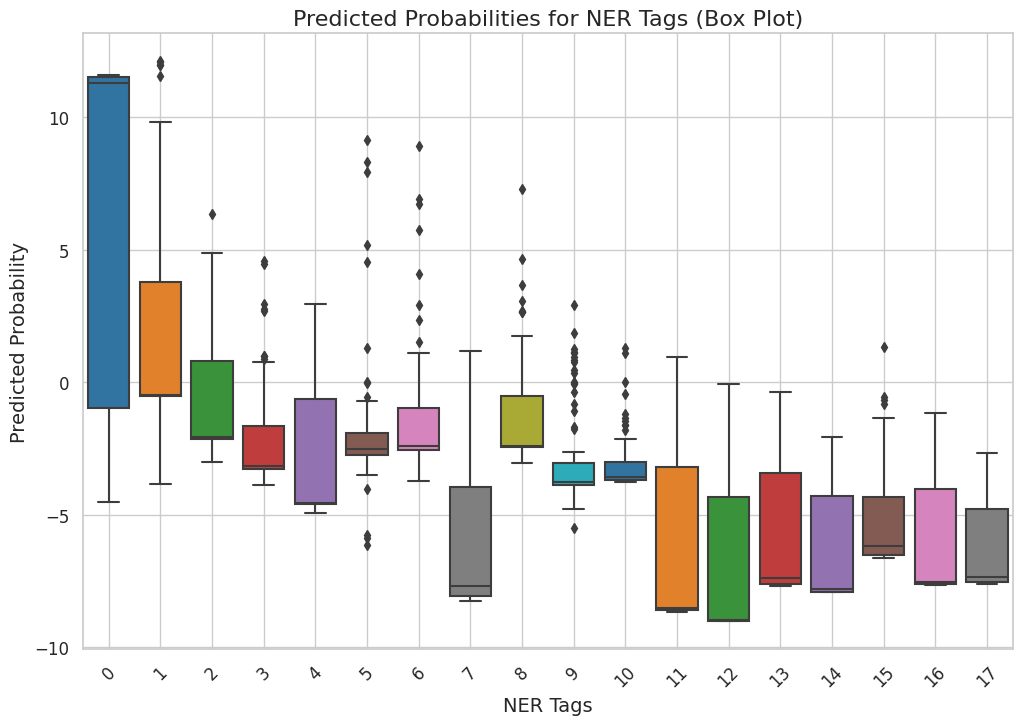

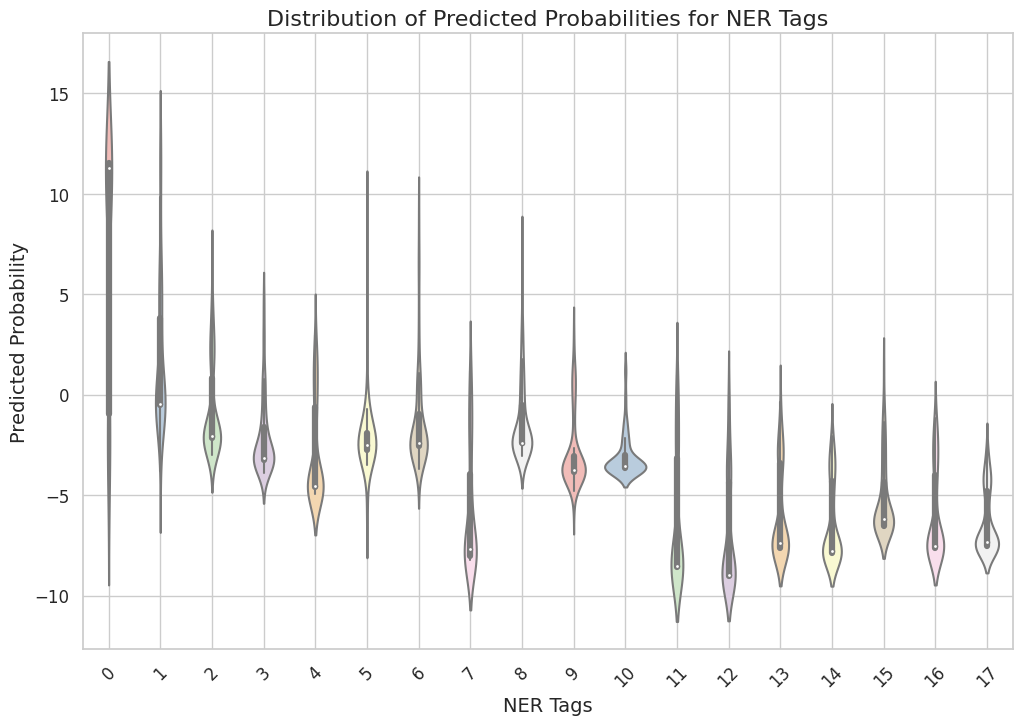

/tmp/ipykernel_24/3961774780.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=predictions[0], markers='o', join=False, ci='sd')


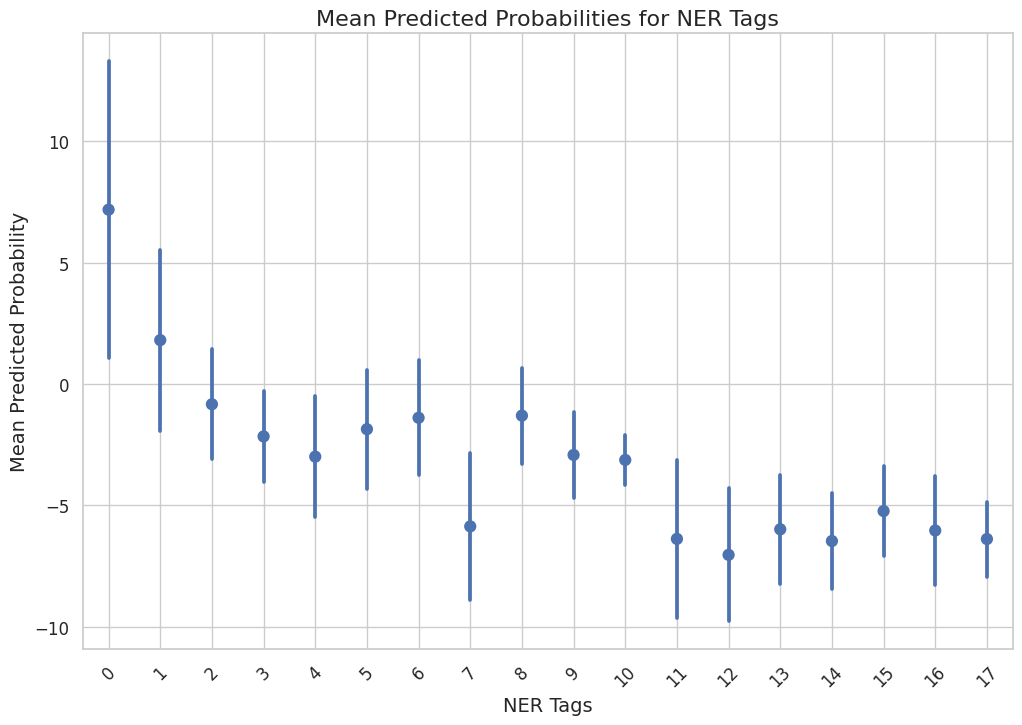

In [30]:
# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=predictions[0], palette='tab10')
plt.title('Predicted Probabilities for NER Tags (Box Plot)', fontsize=16)
plt.xlabel('NER Tags', fontsize=14)
plt.ylabel('Predicted Probability', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


# Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=predictions[0], palette='Pastel1')
plt.title('Distribution of Predicted Probabilities for NER Tags', fontsize=16)
plt.xlabel('NER Tags', fontsize=14)
plt.ylabel('Predicted Probability', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

# Swarm Plot
#plt.figure(figsize=(12, 8))
#sns.swarmplot(data=predictions[0], palette='tab10', size=5)
#plt.title('Predicted Probabilities for NER Tags (Swarm Plot)', fontsize=16)
#plt.xlabel('NER Tags', fontsize=14)
#plt.ylabel('Predicted Probability', fontsize=14)
#plt.xticks(rotation=45, fontsize=12)
#plt.yticks(fontsize=12)
#plt.grid(True)
#plt.show()"""

# Point Plot
plt.figure(figsize=(12, 8))
sns.pointplot(data=predictions[0], markers='o', join=False, ci='sd')
plt.title('Mean Predicted Probabilities for NER Tags', fontsize=16)
plt.xlabel('NER Tags', fontsize=14)
plt.ylabel('Mean Predicted Probability', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

![](https://static.fontget.com/t/h/thank-you/preview@2x.png)